In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df=pd.read_csv("/content/laptop_data_cleaned.csv",lineterminator='\r',error_bad_lines=False)

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,\nApple,Ultrabook,8.0,1.37,11.175755,0.0,1.0,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,\nApple,Ultrabook,8.0,1.34,10.776777,0.0,0.0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,\nHP,Notebook,8.0,1.86,10.329931,0.0,0.0,141.211998,Intel Core i5,0.0,256.0,Intel,Others
3,\nApple,Ultrabook,16.0,1.83,11.814476,0.0,1.0,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,\nApple,Ultrabook,8.0,1.37,11.473101,0.0,1.0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,\nLenovo,2 in 1 Convertible,4.0,1.80,10.433899,1.0,1.0,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1270,\nLenovo,2 in 1 Convertible,16.0,1.30,11.288115,1.0,1.0,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1271,\nLenovo,Notebook,2.0,1.50,9.409283,0.0,0.0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1272,\nHP,Notebook,6.0,2.19,10.614129,0.0,0.0,100.454670,Intel Core i7,1000.0,0.0,AMD,Windows


In [ ]:
df.shape

(1274, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   float64
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   float64
 6   Ips          1273 non-null   float64
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   float64
 10  SSD          1273 non-null   float64
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(8), object(5)
memory usage: 129.5+ KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Company        0
TypeName       1
Ram            1
Weight         1
Price          1
TouchScreen    1
Ips            1
Ppi            1
Cpu_brand      1
HDD            1
SSD            1
Gpu_brand      1
Os             1
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

<ipython-input-10-51e2c94c543c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [ ]:
df.tail(50)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1223,\nDell,2 in 1 Convertible,4.0,2.08,10.208009,1.0,0.0,146.860478,Intel Core i3,500.0,0.0,Intel,Windows
1224,\nAsus,Notebook,4.0,2.65,9.708902,0.0,0.0,100.454670,Other Intel Processor,1000.0,0.0,Intel,Windows
1225,\nDell,Ultrabook,8.0,1.29,11.273329,1.0,0.0,276.053530,Intel Core i7,0.0,256.0,Intel,Windows
1226,\nDell,Notebook,4.0,2.18,10.232960,0.0,0.0,100.454670,Intel Core i5,1000.0,0.0,Intel,Others
1227,\nLenovo,Gaming,16.0,2.60,10.911904,1.0,1.0,141.211998,Intel Core i7,1000.0,128.0,Nvidia,Windows
1228,\nMSI,Gaming,8.0,2.20,11.022208,0.0,0.0,141.211998,Intel Core i7,1000.0,128.0,Nvidia,Windows
1229,\nLenovo,Netbook,16.0,1.30,11.384092,1.0,1.0,176.232574,Intel Core i7,0.0,512.0,Intel,Windows
1230,\nRazer,Gaming,16.0,1.95,12.135794,0.0,0.0,157.350512,Intel Core i7,0.0,1000.0,Nvidia,Windows
1231,\nDell,Notebook,8.0,2.30,10.126185,1.0,0.0,100.454670,Intel Core i3,1000.0,0.0,Intel,Windows
1232,\nMSI,Gaming,16.0,2.70,11.352069,0.0,0.0,127.335675,Intel Core i7,1000.0,256.0,Nvidia,Windows


In [ ]:
df["Company"]=df["Company"].str.replace('\n','')

<ipython-input-12-0662873985ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Company"]=df["Company"].str.replace('\n','')


In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8.0,1.37,11.175755,0.0,1.0,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,10.776777,0.0,0.0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,10.329931,0.0,0.0,141.211998,Intel Core i5,0.0,256.0,Intel,Others
3,Apple,Ultrabook,16.0,1.83,11.814476,0.0,1.0,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,11.473101,0.0,1.0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4.0,2.20,10.555257,0.0,0.0,100.454670,Intel Core i7,500.0,0.0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4.0,1.80,10.433899,1.0,1.0,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16.0,1.30,11.288115,1.0,1.0,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1271,Lenovo,Notebook,2.0,1.50,9.409283,0.0,0.0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-15-bd11fd8d838a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

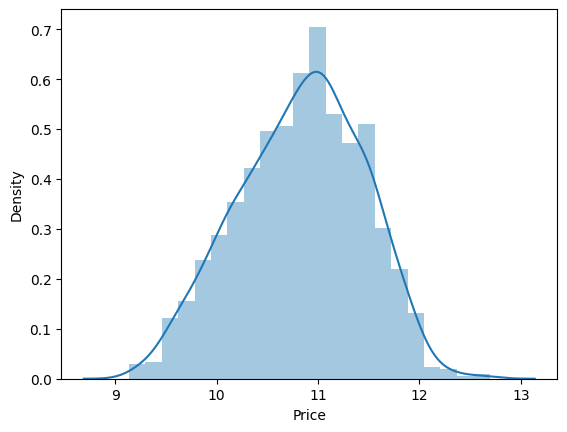

In [ ]:
sns.distplot(df["Price"])

<Axes: >

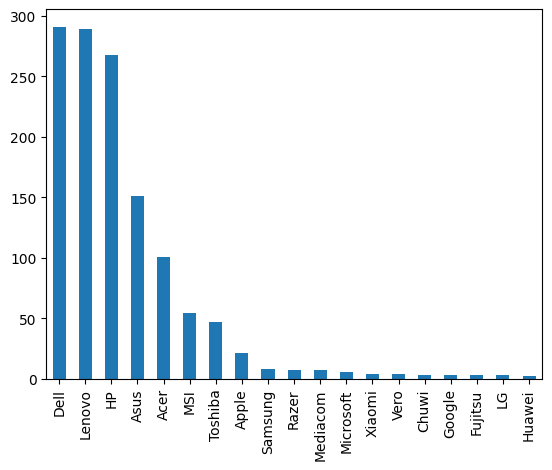

In [ ]:
df["Company"].value_counts().plot(kind='bar')

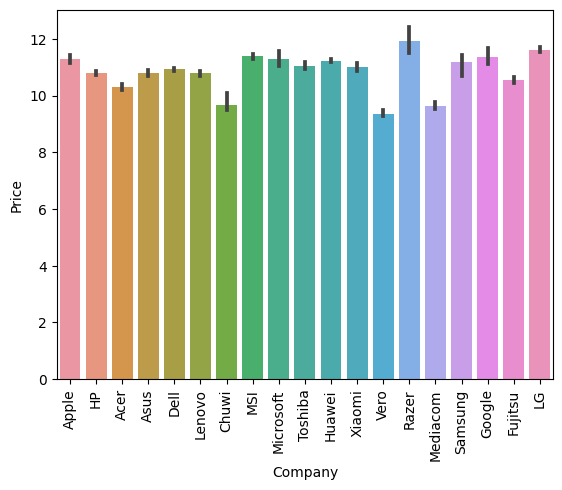

In [ ]:
sns.barplot(x=df['Company'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

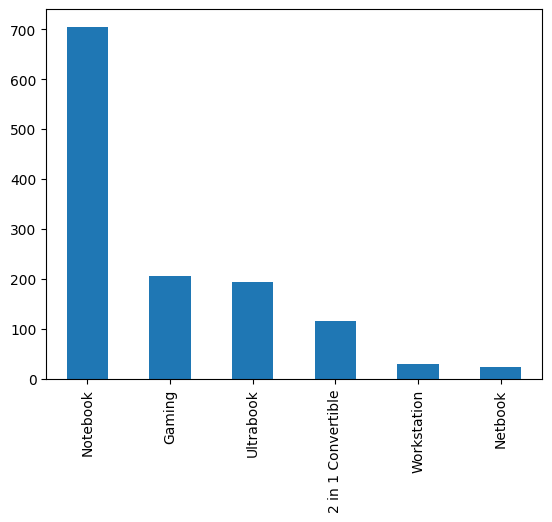

In [ ]:
df["TypeName"].value_counts().plot(kind='bar')

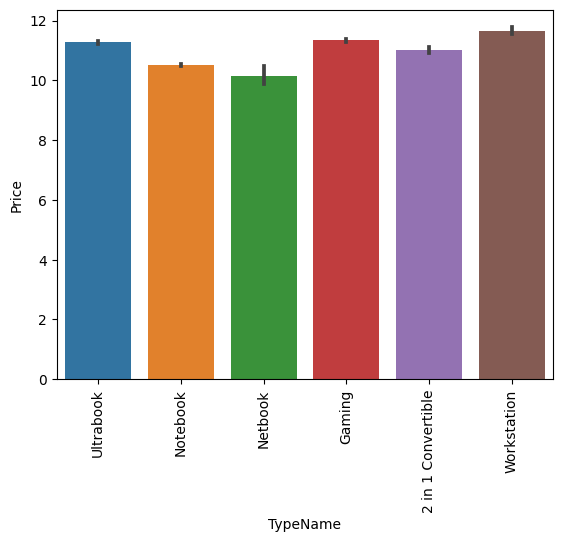

In [ ]:
sns.barplot(x=df['TypeName'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

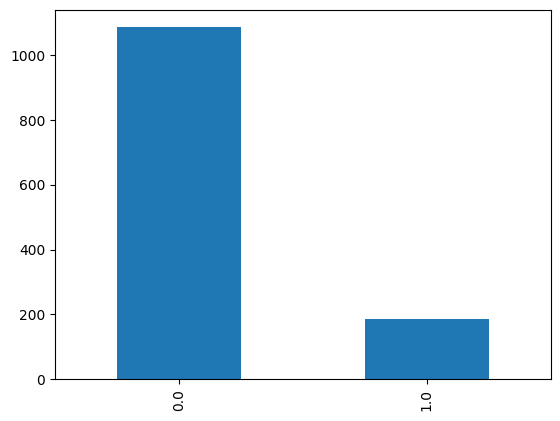

In [ ]:
df["TouchScreen"].value_counts().plot(kind="bar")

<Axes: xlabel='TouchScreen', ylabel='Price'>

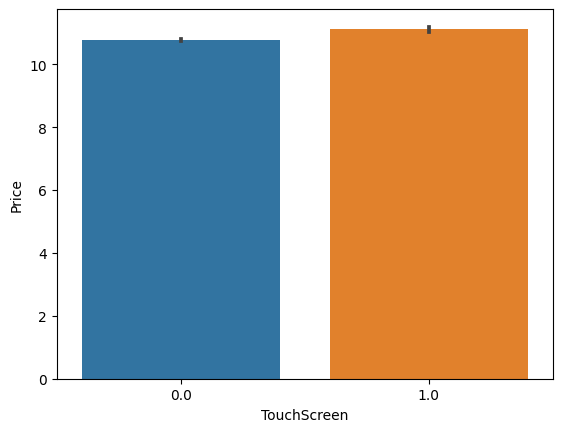

In [ ]:
sns.barplot(x=df["TouchScreen"],y=df['Price'])

<Axes: >

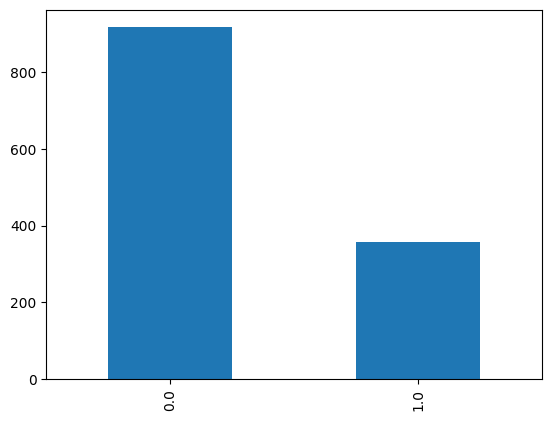

In [ ]:
df["Ips"].value_counts().plot(kind="bar")

<Axes: xlabel='Ips', ylabel='Price'>

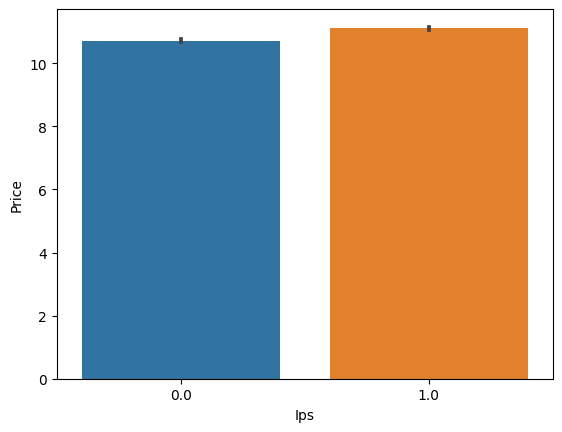

In [ ]:
sns.barplot(x=df["Ips"],y=df["Price"])

In [ ]:
df.corr()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.388629,0.681019,0.113073,0.202473,0.295336,0.096845,0.599540
Weight,0.388629,1.000000,0.151861,-0.292900,0.023368,-0.319291,0.510531,-0.057331
Price,0.681019,0.151861,1.000000,0.194436,0.279483,0.480621,-0.097155,0.658962
TouchScreen,0.113073,-0.292900,0.194436,1.000000,0.136800,0.452313,-0.205431,0.252067
Ips,0.202473,0.023368,0.279483,0.136800,1.000000,0.289112,-0.090839,0.215085
Ppi,0.295336,-0.319291,0.480621,0.452313,0.289112,1.000000,-0.290595,0.500062
HDD,0.096845,0.510531,-0.097155,-0.205431,-0.090839,-0.290595,1.000000,-0.400937
SSD,0.599540,-0.057331,0.658962,0.252067,0.215085,0.500062,-0.400937,1.000000


<Axes: >

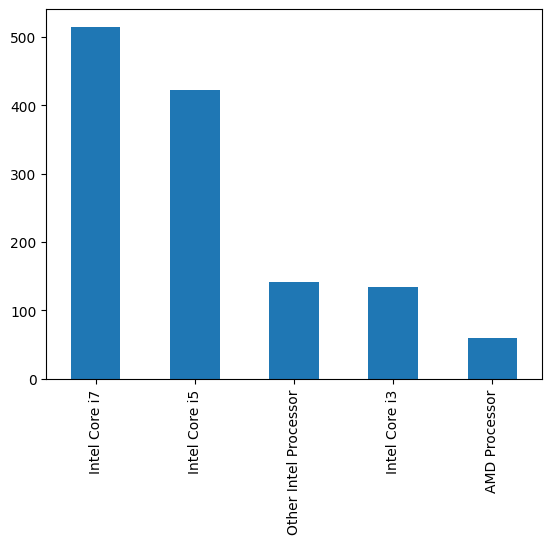

In [ ]:
df["Cpu_brand"].value_counts().plot(kind="bar")

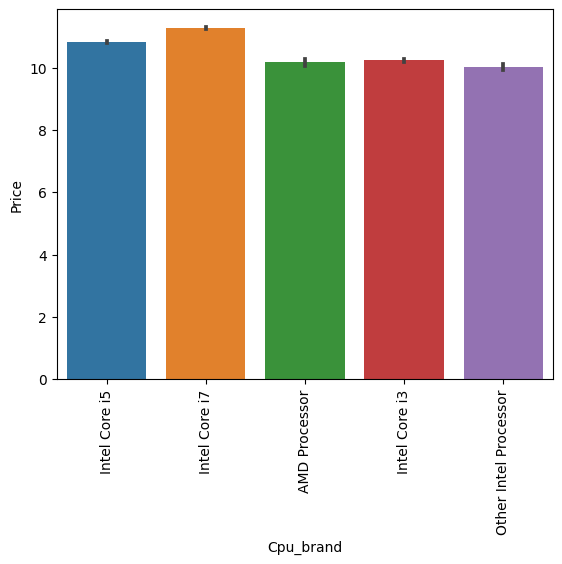

In [ ]:
sns.barplot(x=df['Cpu_brand'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

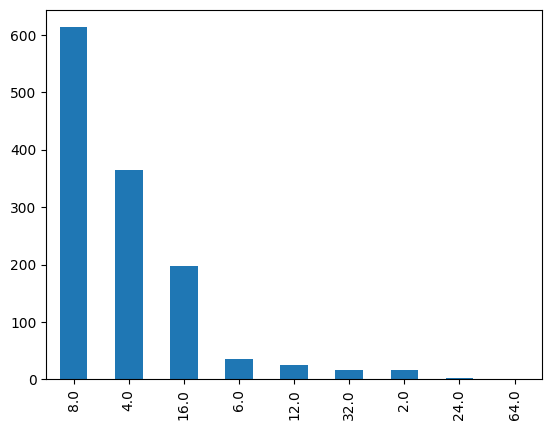

In [ ]:
df["Ram"].value_counts().plot(kind="bar")

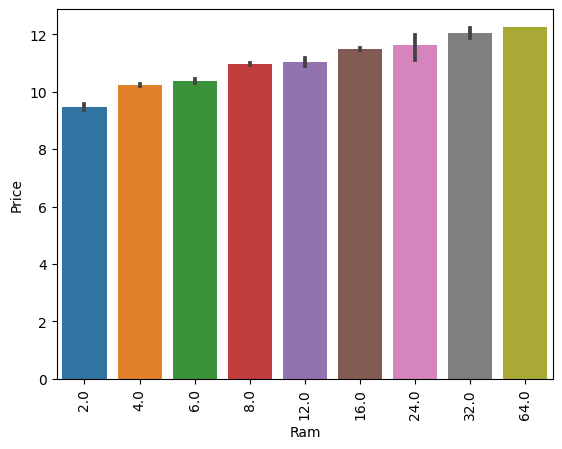

In [ ]:
sns.barplot(x=df['Ram'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8.0,1.37,11.175755,0.0,1.0,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,10.776777,0.0,0.0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,10.329931,0.0,0.0,141.211998,Intel Core i5,0.0,256.0,Intel,Others
3,Apple,Ultrabook,16.0,1.83,11.814476,0.0,1.0,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,11.473101,0.0,1.0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4.0,2.20,10.555257,0.0,0.0,100.454670,Intel Core i7,500.0,0.0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4.0,1.80,10.433899,1.0,1.0,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16.0,1.30,11.288115,1.0,1.0,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1271,Lenovo,Notebook,2.0,1.50,9.409283,0.0,0.0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows


In [ ]:
df["SSD"]

0       128.0
1         0.0
2       256.0
3       512.0
4       256.0
        ...  
1268      0.0
1269    128.0
1270    512.0
1271      0.0
1272      0.0
Name: SSD, Length: 1272, dtype: float64

<Axes: >

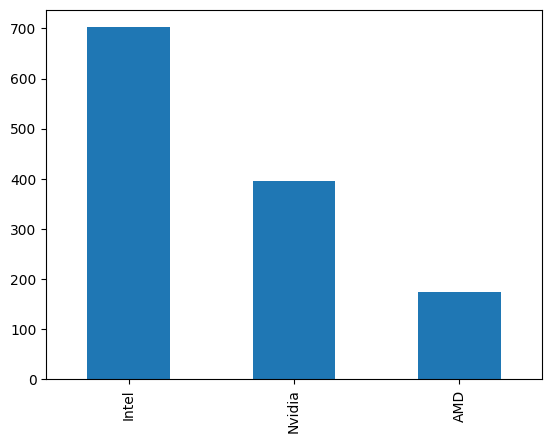

In [ ]:
df["Gpu_brand"].value_counts().plot(kind="bar")

<Axes: >

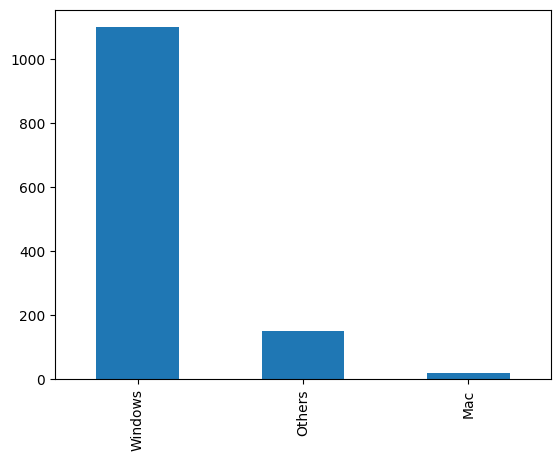

In [ ]:
df["Os"].value_counts().plot(kind="bar")

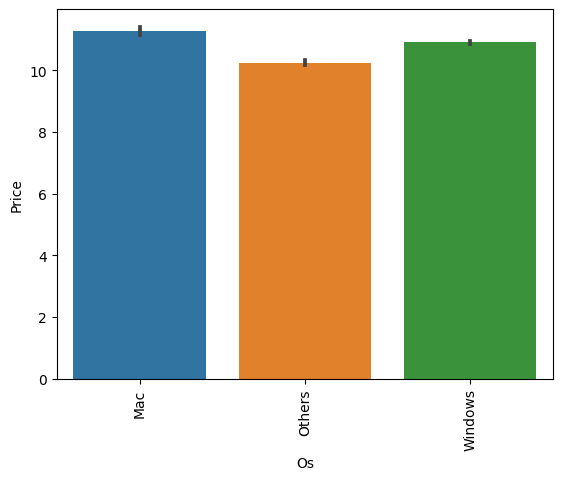

In [ ]:
sns.barplot(x=df['Os'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-34-1ea92dbb7546>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

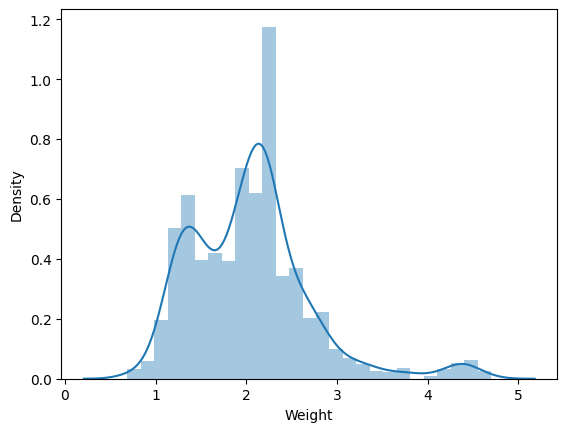

In [ ]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

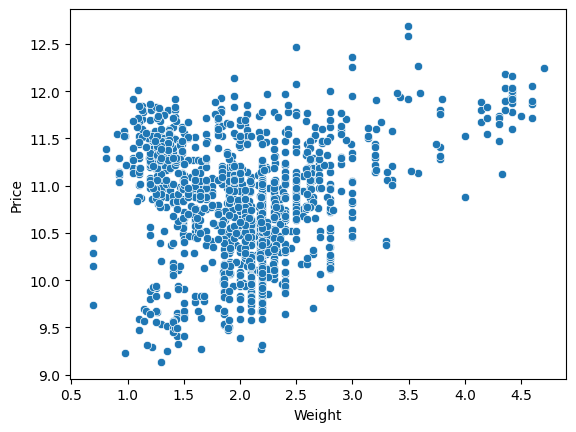

In [ ]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

<Axes: >

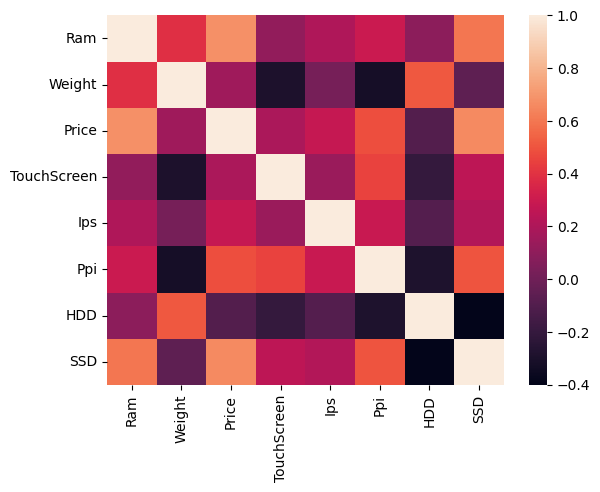

In [ ]:
sns.heatmap(df.corr())

<ipython-input-37-bd11fd8d838a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

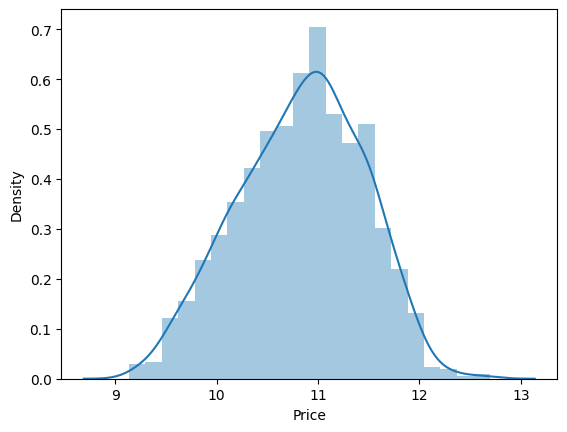

In [ ]:
sns.distplot(df["Price"])

In [ ]:
x=df.drop(["Price"],axis=1)
y=df[["Price"]]

In [ ]:
transform1=ColumnTransformer(transformers=[('one hot encoding',OneHotEncoder(sparse=False,drop="first"),["Company","TypeName","Cpu_brand","Gpu_brand","Os"])],
                             remainder='passthrough')


In [ ]:
transformed=transform1.fit_transform(x)

In [ ]:
new_df=pd.DataFrame(transformed)
X=new_df.copy()

In [ ]:
mms=MinMaxScaler()
Y=mms.fit_transform(y)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,1.37,0.0,1.0,226.983005,0.0,128.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,1.34,0.0,0.0,127.677940,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,1.86,0.0,0.0,141.211998,0.0,256.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,1.83,0.0,1.0,220.534624,0.0,512.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,1.37,0.0,1.0,226.983005,0.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,4.0,2.20,0.0,0.0,100.454670,500.0,0.0
1268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,4.0,1.80,1.0,1.0,157.350512,0.0,128.0
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,16.0,1.30,1.0,1.0,276.053530,0.0,512.0
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.50,0.0,0.0,111.935204,0.0,0.0


In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8.0,1.37,11.175755,0.0,1.0,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,10.776777,0.0,0.0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,10.329931,0.0,0.0,141.211998,Intel Core i5,0.0,256.0,Intel,Others
3,Apple,Ultrabook,16.0,1.83,11.814476,0.0,1.0,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,11.473101,0.0,1.0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4.0,2.20,10.555257,0.0,0.0,100.454670,Intel Core i7,500.0,0.0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4.0,1.80,10.433899,1.0,1.0,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16.0,1.30,11.288115,1.0,1.0,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1271,Lenovo,Notebook,2.0,1.50,9.409283,0.0,0.0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
lnr=LinearRegression()
lnr.fit(xtrain,ytrain)
lnr.score(xtest,ytest)

0.8176453668304051

In [ ]:
ypred=lnr.predict(xtest)

In [ ]:
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.8176453668304051
mae 0.05665247187189388


In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1017, 38), (1017, 1), (255, 38), (255, 1))

Voting Regressor

In [ ]:
rf=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=16)
gbdt=GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb=XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=16)

In [ ]:
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

<ipython-input-51-5e1294863618>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


0.8646471780583322

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
model=VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

In [ ]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 scoere 0.8712388895261196
mae 0.047657833129341014


Stacking Regressor

In [ ]:
rf=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=16)
gbdt=GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb=XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
model1=[('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)]
model2=StackingRegressor(estimators=model1,final_estimator=Ridge(alpha=10))
model2.fit(xtrain,ytrain)
ypred=model2.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 scoere 0.8667640354956192
mae 0.04861783507225024


Ridge

In [ ]:
model3=Ridge(alpha=10)
model3.fit(xtrain,ytrain)
ypred=model3.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.8107116919025539
mae 0.05937776214723502


lasso

In [ ]:
model4=Lasso(alpha=.001)
model4.fit(xtrain,ytrain)
ypred=model4.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.7978355648872251
mae 0.0616835381216756


Knn

In [ ]:
model5=KNeighborsRegressor(n_neighbors=3)
model5.fit(xtrain,ytrain)
ypred=model5.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.8135354550820446
mae 0.056103191173110085


Decision tree

In [ ]:
model6=DecisionTreeRegressor(max_depth=10)
model6.fit(xtrain,ytrain)
ypred=model6.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.7795010547094768
mae 0.06242109814321046


SVM

In [ ]:
model7=SVR(kernel='rbf',epsilon=0.1)
model7.fit(xtrain,ytrain)
ypred=model7.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

r2 scoere 0.6665211376579139
mae 0.08002143350125268


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest

In [ ]:
model8=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
model8.fit(xtrain,ytrain)
ypred=model8.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

<ipython-input-60-3c4216e0f79e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model8.fit(xtrain,ytrain)


r2 scoere 0.8594754537068564
mae 0.048891180444642454


Extra tree

In [ ]:
model9=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=15)
model9.fit(xtrain,ytrain)
ypred=model9.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

<ipython-input-61-ee16ac648aad>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model9.fit(xtrain,ytrain)


r2 scoere 0.8615617707958337
mae 0.04970618368895222


AdaBoost

In [ ]:
model10=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
model10.fit(xtrain,ytrain)
ypred=model10.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 scoere 0.7785064266141342
mae 0.06673443256872684


GradientBoost

In [ ]:
model11=GradientBoostingRegressor(n_estimators=500)
model11.fit(xtrain,ytrain)
ypred=model11.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 scoere 0.8868747687349129
mae 0.04514082512737884


xgboost

In [ ]:
model12=GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.5)
model12.fit(xtrain,ytrain)
ypred=model12.predict(xtest)
print('r2 scoere',r2_score(ytest,ypred))
print('mae',mean_absolute_error(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 scoere 0.8701537094304574
mae 0.04623351584550835
